In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import math
import statistics as stat
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data2018 = pd.read_csv('/content/drive/MyDrive/Crime_Data_2018 (1).csv')
data2018.head()

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-18-037885,5/19/2018 22:16,5/19/2018 21:30,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,4TH DIVISION,424,RESIDENCE / HOME,3300 BLOCK DEARCY AVE ...,LOUISVILLE,40215.0,455888
1,80-18-037894,5/19/2018 22:54,5/19/2018 22:40,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,2ND DIVISION,212,RESIDENCE / HOME,600 BLOCK LINDELL AVE ...,LOUISVILLE,40211.0,455889
2,80-18-032150,4/30/2018 20:37,4/30/2018 20:37,TBUT OR DISP ALL OTHERS < $500,THEFT/LARCENY,23H,PART I,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,700 BLOCK S CLAY ST ...,LOUISVILLE,40203.0,455890
3,80-18-037844,5/19/2018 19:19,5/18/2018 19:19,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,6TH DIVISION,624,RESIDENCE / HOME,200 BLOCK ELDORADO AVE ...,LOUISVILLE,40218.0,455891
4,80-18-037844,5/19/2018 19:19,5/18/2018 19:19,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,6TH DIVISION,624,RESIDENCE / HOME,200 BLOCK ELDORADO AVE ...,LOUISVILLE,40218.0,455892


In [5]:
data2017 = pd.read_csv('/content/drive/MyDrive/Crime_Data_2017_9.csv')
data2017.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-16-111411,2017-01-01 08:24:55,2016-12-30 21:00:00,TBUT OR DISP ALL OTHERS < $500,THEFT/LARCENY,23H,PART I,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,1600 BLOCK DUMESNIL ST ...,LOUISVILLE,40210,1062371
1,80-17-000033,2017-01-01 05:20:56,2016-12-31 18:30:00,TBUT OR DISP CONTENTS FROM VEH < $500,VEHICLE BREAK-IN/THEFT,23F,PART I,COMPLETED,3RD DIVISION,331,PARKING LOT / GARAGE,4500 BLOCK GREENWOOD RD ...,LOUISVILLE,40258,1062381
2,80-17-000025,2017-01-01 00:57:00,2017-01-01 00:30:00,ASSAULT - 4TH DEGREE (MINOR INJURY),ASSAULT,13B,PART II,COMPLETED,7TH DIVISION,736,HOTEL / MOTEL / ETC.,6500 BLOCK SIGNATURE DR ...,LOUISVILLE,40213,1062384
3,80-17-000005,2017-01-01 00:20:00,2017-01-01 00:01:00,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,1ST DIVISION,123,PARKING LOT / GARAGE,500 BLOCK S 5TH ST ...,LOUISVILLE,40202,1062385
4,80-17-000037,2017-01-01 00:35:00,2017-01-01 00:15:00,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,7TH DIVISION,735,RESIDENCE / HOME,6100 BLOCK OVERHILL DR ...,LOUISVILLE,40229,1062386


In [6]:
data2016 = pd.read_csv('/content/drive/MyDrive/Crime_Data_2016_39.csv')
data2016.head()

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-16-001215,2016-01-02 14:08:00,2015-12-21 08:00:00,TBUT OR DISP FIREARM,THEFT/LARCENY,23H,PART I,COMPLETED,3RD DIVISION,316,RESIDENCE / HOME,5100 BLOCK BLEVINS GAP RD ...,LOUISVILLE,40272.0,983226
1,80-16-001235,2016-01-03 13:10:17,2016-01-03 12:58:17,"TBUT OR DISP AUTO > $500 BUT < $10,000",MOTOR VEHICLE THEFT,240,PART I,COMPLETED,2ND DIVISION,225,HIGHWAY / ROAD / ALLEY,BRASHEAR DR / MOORE CT ...,LOUISVILLE,40210.0,983227
2,80-16-001250,2016-01-02 19:06:00,2016-01-02 19:00:00,TBUT OR DISP SHOPLIFTING < $500,THEFT/LARCENY,23C,PART I,COMPLETED,7TH DIVISION,723,GROCERY / SUPERMARKET,7800 BLOCK BEULAH CHURCH RD ...,LOUISVILLE,40228.0,983228
3,80-16-001268,2016-01-02 21:14:00,2016-01-02 21:00:00,TBUT OR DISP SHOPLIFTING < $500,THEFT/LARCENY,23C,PART I,COMPLETED,3RD DIVISION,331,DEPARTMENT / DISCOUNT STORE,7100 BLOCK RAGGARD RD ...,LOUISVILLE,40216.0,983229
4,80-16-001216,2016-01-02 17:16:00,2016-01-02 17:16:00,INJURED PERSON REQUIRING POLICE REPORT,OTHER,999,PART II,COMPLETED,4TH DIVISION,412,PARKING LOT / GARAGE,S FLOYD ST / E JACOB ST ...,LOUISVILLE,40203.0,983230


In [7]:
data2015 = pd.read_csv('/content/drive/MyDrive/Crime_Data_2015.csv')
data2015.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-15-095254,2015-11-23 08:30:00,2015-11-22 23:00:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,7TH DIVISION,712,OTHER RESIDENCE (APARTMENT/CONDO),10500 BLOCK GLENMARY FARM DR ...,LOUISVILLE,40291,26544
1,80-15-075641,2015-09-21 16:00:00,2015-09-21 16:00:00,CRIMINAL MISCHIEF - 1ST DEGREE,VANDALISM,290,PART II,COMPLETED,3RD DIVISION,331,HIGHWAY / ROAD / ALLEY,3600 BLOCK BAYMEADOW DR ...,LOUISVILLE,40258,64673
2,80-15-048869,2015-06-25 18:19:00,2015-06-25 18:19:00,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,3RD DIVISION,331,HIGHWAY / ROAD / ALLEY,BLANTON LN / ST ANDREWS CHURCH RD ...,LOUISVILLE,40214,64739
3,80-15-073460,2015-09-14 15:27:00,2015-08-26 12:00:00,SEXUAL ABUSE - 1ST DEGREE,SEX CRIMES,11D,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,5200 BLOCK BROADMOOR BLVD ...,LOUISVILLE,40218,65201
4,80-15-080965,2015-10-08 10:03:00,2015-10-08 10:03:00,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,6TH DIVISION,611,HIGHWAY / ROAD / ALLEY,I 264 RAMP / I 264 RAMP ...,LOUISVILLE,40213,65239


In [8]:
data2014 = pd.read_csv('/content/drive/MyDrive/Crime_Data_2014.csv')
data2014.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-14-048074,2014-06-30 10:46:00,2014-06-29 21:00:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,4TH DIVISION,424,HIGHWAY / ROAD / ALLEY,2900 BLOCK S 3RD ST ...,LOUISVILLE,40208,52593
1,80-14-004033,2014-01-16 18:20:00,2014-01-16 14:45:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,6TH DIVISION,612,OTHER / UNKNOWN,5300 BLOCK PRESTON HWY ...,LOUISVILLE,40213,174296
2,80-14-057665,2014-08-03 07:48:17,2014-07-28 15:54:00,RECEIVING STOLEN PROPERTY U/$500 MISD,THEFT/LARCENY,280,PART II,COMPLETED,3RD DIVISION,331,OTHER / UNKNOWN,6400 BLOCK TRIPLETT WOODS DR ...,LOUISVILLE,40216,321689
3,80-14-092782,2014-12-02 22:50:27,2014-11-28 20:00:00,"RECEIVING STOLEN PROPERTY U/$10,000",THEFT/LARCENY,280,PART II,COMPLETED,1ST DIVISION,123,PARKING LOT / GARAGE,400 BLOCK W MAIN ST ...,LOUISVILLE,40202,400889
4,80-14-092782,2014-12-02 22:50:27,2014-11-28 20:00:00,CRIMINAL POSSESSION FORGED INSTRUMENT-1ST DEGR...,FRAUD,250,PART II,COMPLETED,1ST DIVISION,123,PARKING LOT / GARAGE,400 BLOCK W MAIN ST ...,LOUISVILLE,40202,401339


In [9]:
data = pd.concat([data2018,data2017,data2016,data2015,data2014])

In [10]:
data.head()

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-18-037885,5/19/2018 22:16,5/19/2018 21:30,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,4TH DIVISION,424,RESIDENCE / HOME,3300 BLOCK DEARCY AVE ...,LOUISVILLE,40215,455888
1,80-18-037894,5/19/2018 22:54,5/19/2018 22:40,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,2ND DIVISION,212,RESIDENCE / HOME,600 BLOCK LINDELL AVE ...,LOUISVILLE,40211,455889
2,80-18-032150,4/30/2018 20:37,4/30/2018 20:37,TBUT OR DISP ALL OTHERS < $500,THEFT/LARCENY,23H,PART I,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,700 BLOCK S CLAY ST ...,LOUISVILLE,40203,455890
3,80-18-037844,5/19/2018 19:19,5/18/2018 19:19,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,6TH DIVISION,624,RESIDENCE / HOME,200 BLOCK ELDORADO AVE ...,LOUISVILLE,40218,455891
4,80-18-037844,5/19/2018 19:19,5/18/2018 19:19,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,6TH DIVISION,624,RESIDENCE / HOME,200 BLOCK ELDORADO AVE ...,LOUISVILLE,40218,455892


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403706 entries, 0 to 77465
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   INCIDENT_NUMBER  403706 non-null  object
 1   DATE_REPORTED    403706 non-null  object
 2   DATE_OCCURED     403686 non-null  object
 3   UOR_DESC         403706 non-null  object
 4   CRIME_TYPE       403706 non-null  object
 5   NIBRS_CODE       403706 non-null  object
 6   UCR_HIERARCHY    397897 non-null  object
 7   ATT_COMP         402839 non-null  object
 8   LMPD_DIVISION    403706 non-null  object
 9   LMPD_BEAT        402746 non-null  object
 10  PREMISE_TYPE     403350 non-null  object
 11  BLOCK_ADDRESS    403706 non-null  object
 12  CITY             403133 non-null  object
 13  ZIP_CODE         401197 non-null  object
 14  ID               403706 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 49.3+ MB


In [12]:
data.isna().sum()

INCIDENT_NUMBER       0
DATE_REPORTED         0
DATE_OCCURED         20
UOR_DESC              0
CRIME_TYPE            0
NIBRS_CODE            0
UCR_HIERARCHY      5809
ATT_COMP            867
LMPD_DIVISION         0
LMPD_BEAT           960
PREMISE_TYPE        356
BLOCK_ADDRESS         0
CITY                573
ZIP_CODE           2509
ID                    0
dtype: int64

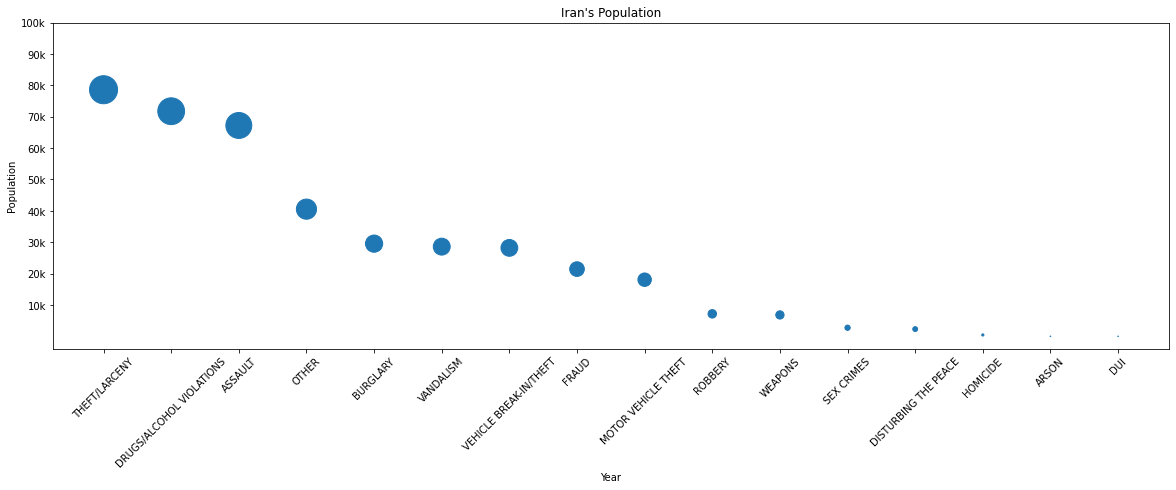

In [13]:
popsize = np.array(list(data['CRIME_TYPE'].value_counts().values))/100
plt.scatter(list(data['CRIME_TYPE'].value_counts().keys()), list(data['CRIME_TYPE'].value_counts().values), s=popsize)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Iran\'s Population')
plt.yticks([10000,20000, 30000, 40000, 50000, 60000, 70000, 80000,90000,100000],['10k','20k','30k','40k','50k','60k','70k','80k','90k','100k'])
plt.xticks(list(data['CRIME_TYPE'].value_counts().keys()),rotation=45)
fig = plt.gcf()
fig.set_size_inches(20, 6, forward=True)
plt.show()

In [14]:
data['CRIME_TYPE'].value_counts()

THEFT/LARCENY               78587
DRUGS/ALCOHOL VIOLATIONS    71743
ASSAULT                     67203
OTHER                       40547
BURGLARY                    29560
VANDALISM                   28608
VEHICLE BREAK-IN/THEFT      28212
FRAUD                       21449
MOTOR VEHICLE THEFT         18076
ROBBERY                      7204
WEAPONS                      6850
SEX CRIMES                   2776
DISTURBING THE PEACE         2345
HOMICIDE                      475
ARSON                          36
DUI                            35
Name: CRIME_TYPE, dtype: int64

In [15]:
data['ZIP_CODE'].value_counts()

40203.0     18508
40214.0     18379
40211.0     18342
40219.0     16990
40215.0     13643
            ...  
38125           1
95794           1
944091.0        1
11239           1
1.0             1
Name: ZIP_CODE, Length: 137, dtype: int64

In [16]:
data['CRIME_TYPE'].unique()

array(['BURGLARY', 'VANDALISM', 'THEFT/LARCENY', 'FRAUD',
       'VEHICLE BREAK-IN/THEFT', 'ASSAULT', 'DRUGS/ALCOHOL VIOLATIONS',
       'OTHER', 'ROBBERY', 'WEAPONS', 'SEX CRIMES', 'MOTOR VEHICLE THEFT',
       'HOMICIDE', 'DISTURBING THE PEACE', 'ARSON', 'DUI'], dtype=object)

In [17]:
random.seed(42)
random.sample(list(data['CRIME_TYPE'].unique()),5)

['FRAUD', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'VEHICLE BREAK-IN/THEFT', 'DUI']

In [18]:
arr = []
arr.append(len(data2014[data2014['CRIME_TYPE'] == 'FRAUD']))
arr.append(len(data2015[data2015['CRIME_TYPE'] == 'FRAUD']))
arr.append(len(data2016[data2016['CRIME_TYPE'] == 'FRAUD']))
arr.append(len(data2017[data2017['CRIME_TYPE'] == 'FRAUD']))
arr.append(len(data2018[data2018['CRIME_TYPE'] == 'FRAUD']))
arr

[3698, 4433, 4349, 4590, 4379]

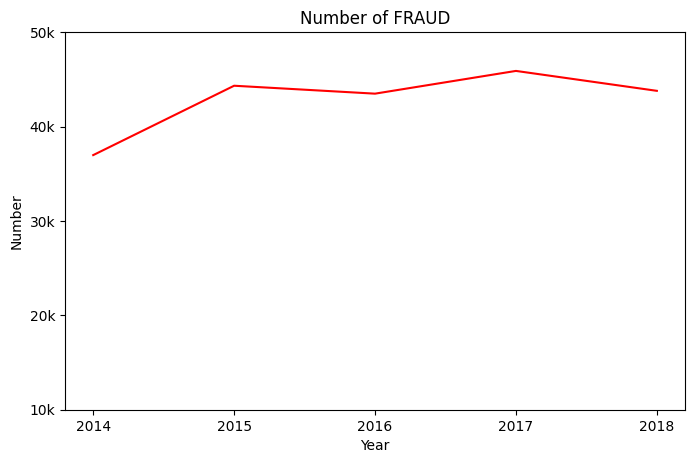

In [19]:
plt.figure(figsize=(8, 5), dpi=100)
plt.plot([2014, 2015, 2016, 2017, 2018], arr, color='red')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of FRAUD')
plt.yticks([1000, 2000, 3000, 4000, 5000],['10k','20k','30k','40k','50k'])
plt.xticks([2014, 2015, 2016, 2017, 2018] )
plt.show()

In [20]:
arr = []
arr.append(len(data2014[data2014['CRIME_TYPE'] == 'BURGLARY']))
arr.append(len(data2015[data2015['CRIME_TYPE'] == 'BURGLARY']))
arr.append(len(data2016[data2016['CRIME_TYPE'] == 'BURGLARY']))
arr.append(len(data2017[data2017['CRIME_TYPE'] == 'BURGLARY']))
arr.append(len(data2018[data2018['CRIME_TYPE'] == 'BURGLARY']))
arr

[6570, 6418, 6085, 5720, 4767]

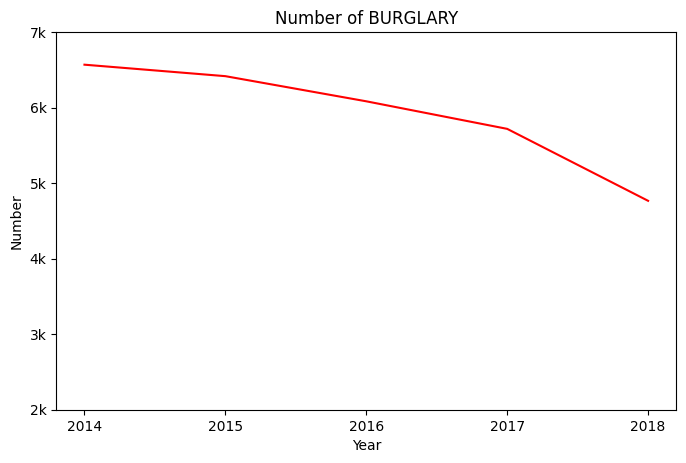

In [21]:
plt.figure(figsize=(8, 5), dpi=100)
plt.plot([2014, 2015, 2016, 2017, 2018], arr, color='red')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of BURGLARY')
plt.yticks([2000,3000, 4000,5000, 6000, 7000],['2k','3k','4k','5k','6k','7k'])
plt.xticks([2014, 2015, 2016, 2017, 2018])
plt.show()

In [22]:
arr = []
arr.append(len(data2014[data2014['CRIME_TYPE'] == 'MOTOR VEHICLE THEFT']))
arr.append(len(data2015[data2015['CRIME_TYPE'] == 'MOTOR VEHICLE THEFT']))
arr.append(len(data2016[data2016['CRIME_TYPE'] == 'MOTOR VEHICLE THEFT']))
arr.append(len(data2017[data2017['CRIME_TYPE'] == 'MOTOR VEHICLE THEFT']))
arr.append(len(data2018[data2018['CRIME_TYPE'] == 'MOTOR VEHICLE THEFT']))
arr

[2504, 3234, 4412, 3995, 3931]

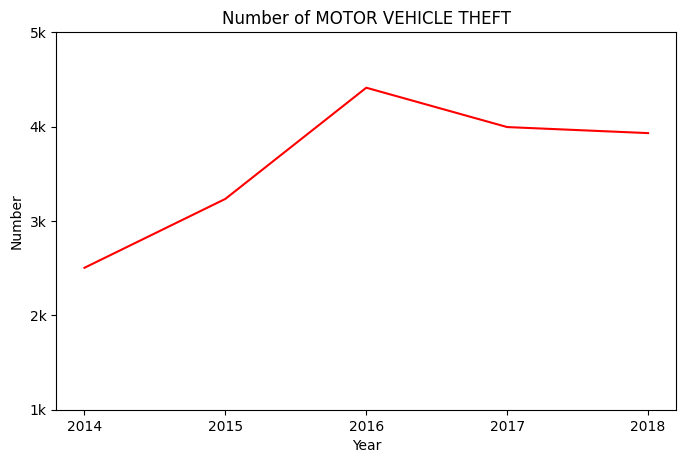

In [23]:
plt.figure(figsize=(8, 5), dpi=100)
plt.plot([2014, 2015, 2016, 2017, 2018], arr, color='red')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of MOTOR VEHICLE THEFT')
plt.yticks([1000, 2000, 3000, 4000, 5000],['1k','2k','3k','4k','5k'])
plt.xticks([2014, 2015, 2016, 2017, 2018])
plt.show()

In [24]:
arr = []
arr.append(len(data2014[data2014['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT']))
arr.append(len(data2015[data2015['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT']))
arr.append(len(data2016[data2016['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT']))
arr.append(len(data2017[data2017['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT']))
arr.append(len(data2018[data2018['CRIME_TYPE'] == 'VEHICLE BREAK-IN/THEFT']))
arr

[4925, 4767, 6427, 6117, 5976]

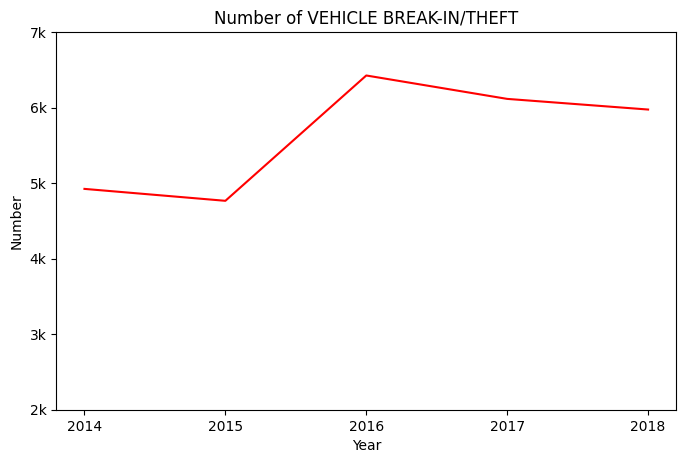

In [25]:
plt.figure(figsize=(8, 5), dpi=100)
plt.plot([2014, 2015, 2016, 2017, 2018], arr, color='red')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of VEHICLE BREAK-IN/THEFT')
plt.yticks([2000,3000, 4000,5000, 6000, 7000],['2k','3k','4k','5k','6k','7k'])
plt.xticks([2014, 2015, 2016, 2017, 2018])
plt.show()

In [40]:
arr = []
arr.append(len(data2014[data2014['CRIME_TYPE'] == 'DUI']))
arr.append(len(data2015[data2015['CRIME_TYPE'] == 'DUI']))
arr.append(len(data2016[data2016['CRIME_TYPE'] == 'DUI']))
arr.append(len(data2017[data2017['CRIME_TYPE'] == 'DUI']))
arr.append(len(data2018[data2018['CRIME_TYPE'] == 'DUI']))
arr

[9, 3, 5, 5, 13]

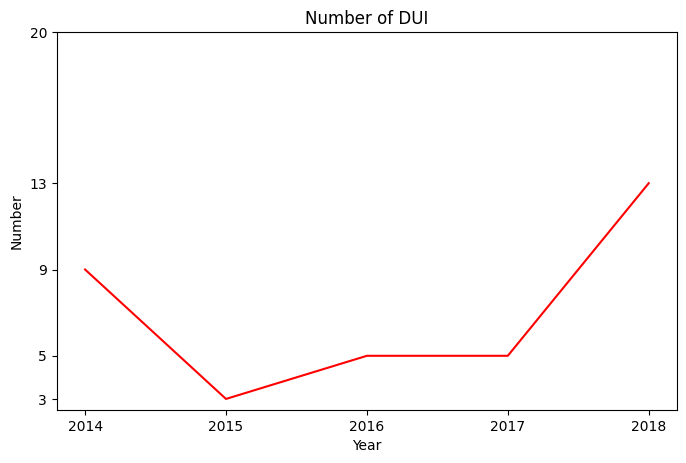

In [41]:
plt.figure(figsize=(8, 5), dpi=100)
plt.plot([2014, 2015, 2016, 2017, 2018], arr, color='red')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of DUI')
plt.yticks([3,5, 9 ,13, 20])
plt.xticks([2014, 2015, 2016, 2017, 2018])
plt.show()

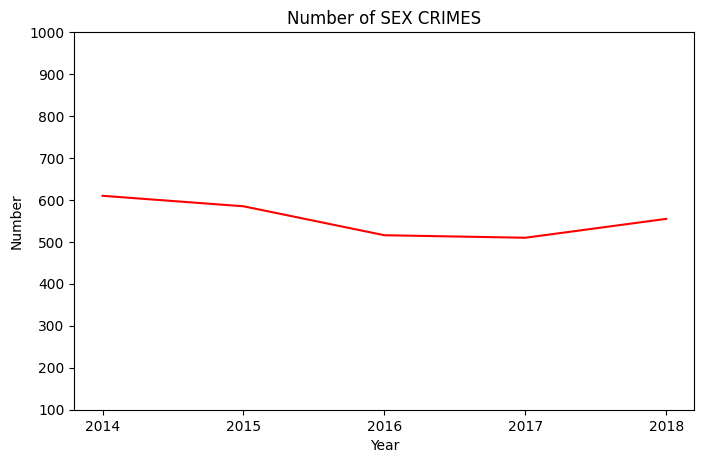

In [28]:
arr = []
arr.append(len(data2014[data2014['CRIME_TYPE'] == 'SEX CRIMES']))
arr.append(len(data2015[data2015['CRIME_TYPE'] == 'SEX CRIMES']))
arr.append(len(data2016[data2016['CRIME_TYPE'] == 'SEX CRIMES']))
arr.append(len(data2017[data2017['CRIME_TYPE'] == 'SEX CRIMES']))
arr.append(len(data2018[data2018['CRIME_TYPE'] == 'SEX CRIMES']))
arr
plt.figure(figsize=(8, 5), dpi=100)
plt.plot([2014, 2015, 2016, 2017, 2018], arr, color='red')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of SEX CRIMES')
plt.yticks([100, 200, 300, 400, 500,600,700,800,900,1000])
plt.xticks([2014, 2015, 2016, 2017, 2018])
plt.show()

In [29]:
data.head()

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,80-18-037885,5/19/2018 22:16,5/19/2018 21:30,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,4TH DIVISION,424,RESIDENCE / HOME,3300 BLOCK DEARCY AVE ...,LOUISVILLE,40215,455888
1,80-18-037894,5/19/2018 22:54,5/19/2018 22:40,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,2ND DIVISION,212,RESIDENCE / HOME,600 BLOCK LINDELL AVE ...,LOUISVILLE,40211,455889
2,80-18-032150,4/30/2018 20:37,4/30/2018 20:37,TBUT OR DISP ALL OTHERS < $500,THEFT/LARCENY,23H,PART I,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,700 BLOCK S CLAY ST ...,LOUISVILLE,40203,455890
3,80-18-037844,5/19/2018 19:19,5/18/2018 19:19,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,6TH DIVISION,624,RESIDENCE / HOME,200 BLOCK ELDORADO AVE ...,LOUISVILLE,40218,455891
4,80-18-037844,5/19/2018 19:19,5/18/2018 19:19,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,6TH DIVISION,624,RESIDENCE / HOME,200 BLOCK ELDORADO AVE ...,LOUISVILLE,40218,455892


In [30]:
data2018['diffrence_time'] = pd.to_datetime(data2018['DATE_REPORTED']) - pd.to_datetime(data2018['DATE_OCCURED'])
data2017['diffrence_time'] = pd.to_datetime(data2017['DATE_REPORTED']) - pd.to_datetime(data2017['DATE_OCCURED'])

In [31]:
arr = [x.total_seconds() for x in data2018['diffrence_time']]
data2018['diffrence_time'] = arr
data2018['diffrence_time'] = data2018['diffrence_time']/3600
arr = [x.total_seconds() for x in data2017['diffrence_time']]
data2017['diffrence_time'] = arr
data2017['diffrence_time'] = data2017['diffrence_time']/3600

In [32]:
list(data2018['CRIME_TYPE'].unique())

['BURGLARY',
 'VANDALISM',
 'THEFT/LARCENY',
 'FRAUD',
 'VEHICLE BREAK-IN/THEFT',
 'ASSAULT',
 'DRUGS/ALCOHOL VIOLATIONS',
 'OTHER',
 'ROBBERY',
 'WEAPONS',
 'SEX CRIMES',
 'MOTOR VEHICLE THEFT',
 'HOMICIDE',
 'DISTURBING THE PEACE',
 'ARSON',
 'DUI']

In [53]:
arr = []
s = list(data2018['CRIME_TYPE'].unique())
for string in s:
  sumation = sum(data2018[data2018['CRIME_TYPE'] == string]['diffrence_time'])
  size = len(data2018[data2018['CRIME_TYPE'] == string]['diffrence_time'])
  arr.append(sumation/size)

In [54]:
arr[10]

21364.789189189178

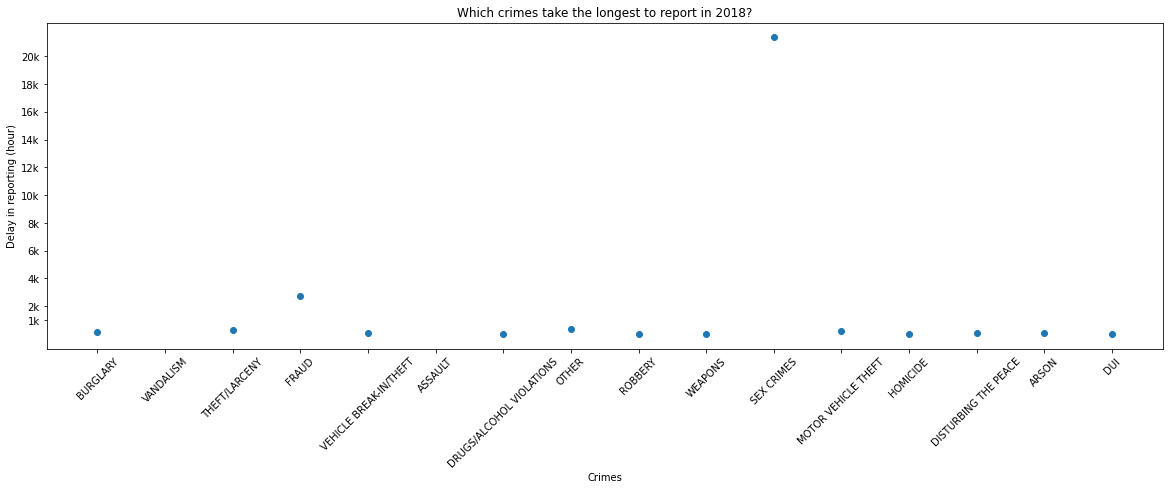

In [43]:
plt.scatter(s, arr)
plt.xlabel('Crimes')
plt.ylabel('Delay in reporting (hour)')
plt.title('Which crimes take the longest to report in 2018?')
plt.yticks([1000,2000, 4000, 6000, 8000, 10000, 12000, 14000,16000,18000,20000],['1k','2k','4k','6k','8k','10k','12k','14k','16k','18k','20k'])
plt.xticks(s,rotation=45)
fig = plt.gcf()
fig.set_size_inches(20, 6, forward=True)
plt.show()

In [55]:
arr = []
s = list(data2017['CRIME_TYPE'].unique())
for string in s:
  sumation = sum(data2017[data2017['CRIME_TYPE'] == string]['diffrence_time'])
  size = len(data2017[data2017['CRIME_TYPE'] == string]['diffrence_time'])
  arr.append(sumation/size)

In [56]:
arr[12]

12139.249150326794

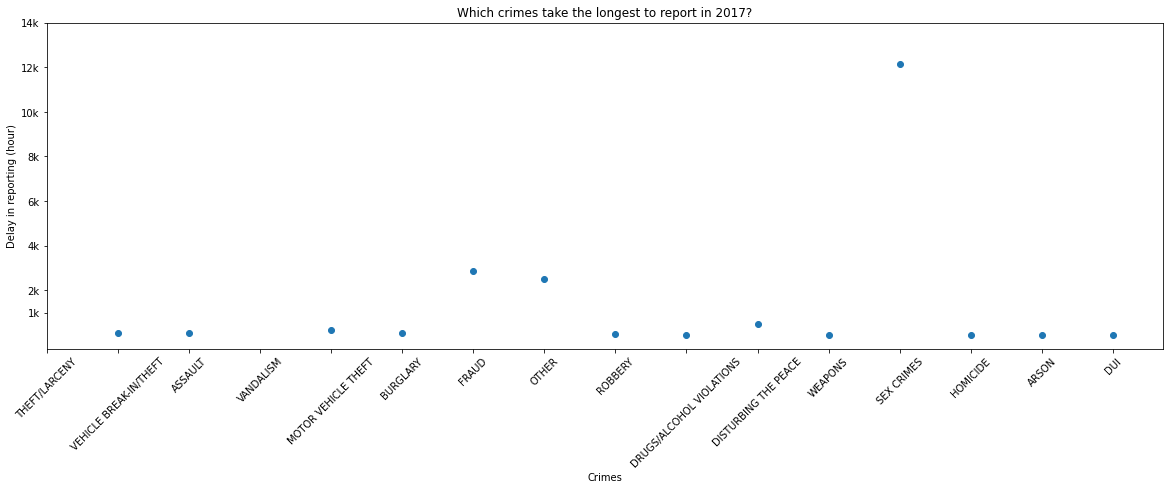

In [45]:
plt.scatter(s, arr)
plt.xlabel('Crimes')
plt.ylabel('Delay in reporting (hour)')
plt.title('Which crimes take the longest to report in 2017?')
plt.yticks([1000,2000, 4000, 6000, 8000, 10000, 12000, 14000],['1k','2k','4k','6k','8k','10k','12k','14k'])
plt.xticks(s,rotation=45)
fig = plt.gcf()
fig.set_size_inches(20, 6, forward=True)
plt.show()